model notebok

here we will build train creat evaluet our model step by step 

IMPORT LIBRARIES 

In [191]:
import numpy as np
import pandas as pd
import tensorflow as tf 
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input , Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, Adagrad, Adamax, RMSprop

EXTRACT DATA FROM THE DATASET


In [192]:
fldr="./UTKFace"
import os
files=os.listdir(fldr)

create list of image from dataset

In [193]:
ages=[]
genders=[]
images=[]

for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)

    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))

    images.append(image)


create list of gfender and age from dataset

In [ ]:
for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])

    ages.append(age)
    genders.append(gender)

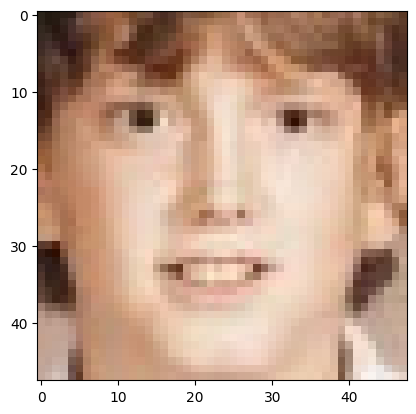

In [ ]:
plt.imshow(images[500])

In [ ]:
print(ages[500])

14


In [ ]:
print(genders[500])

0


In [ ]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [ ]:
#saved the array of images,ages,gensders
np.save(fldr + 'image.npy',images_f)
np.save(fldr+'age.npy',ages_f)
np.save(fldr+'gender.npy',genders_f)

plotting the image

In [ ]:
#for counting the elemnts in the data set male and female
values,counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


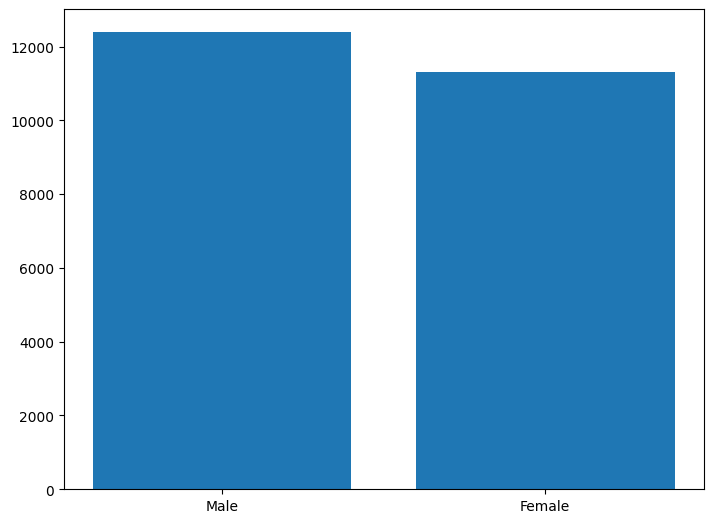

In [ ]:
#plotting the no.of male and female samples 

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()

In [ ]:
values,counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


TypeError: 'str' object is not callable

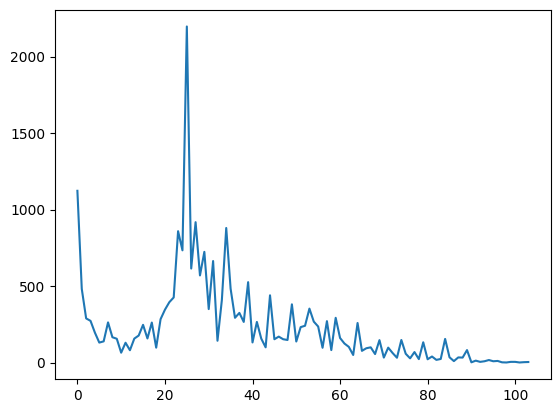

In [ ]:
#plotting sample age wise
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

In [ ]:
#defining labels for output 
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

In [ ]:
#creating another list of imGES FROM exsisting one for better learning (downscale images) 
images_f_2=images_f/255
images_f_2.shape


(23708, 48, 48, 3)

In [ ]:
labels_f=np.array(labels)
print(len(labels_f))


23708


SPLIT THE DATA SET

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(images_f_2, labels_f, test_size=0.25)


In [ ]:
Y_train[0:5]

array([[44,  0],
       [34,  1],
       [26,  0],
       [33,  1],
       [22,  1]])

In [ ]:
#spliting Y test and Y train further for better understanding 
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [ ]:
Y_train_2[0][0:5]

array([0, 1, 0, 1, 1])

In [ ]:
Y_train_2[1][0:5]

array([44, 34, 26, 33, 22])

DEFINE MODEL

In [ ]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [ ]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten= Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy","accuracy"])
    return model

In [ ]:
Model=model((48,48,3))

In [ ]:
Model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 48, 48,    │        896 │ input_layer_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_36          │ (None, 48, 48,    │          0 │ conv2d_24[0][0]   │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_24       │ (None, 48, 48,    │          0 │ dropout_36[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_24    │ (None, 24, 24,    │          0 │ activation_24[0]… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 24, 24,    │     18,496 │ max_pooling2d_24… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_37          │ (None, 24, 24,    │          0 │ conv2d_25[0][0]   │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_25       │ (None, 24, 24,    │          0 │ dropout_37[0][0]  │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_25    │ (None, 12, 12,    │          0 │ activation_25[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 12, 12,    │     73,856 │ max_pooling2d_25… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_38          │ (None, 12, 12,    │          0 │ conv2d_26[0][0]   │
│ (Dropout)           │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_26       │ (None, 12, 12,    │          0 │ dropout_38[0][0]  │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_26    │ (None, 6, 6, 128) │          0 │ activation_26[0]… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 6, 6, 256) │    295,168 │ max_pooling2d_26… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_39          │ (None, 6, 6, 256) │          0 │ conv2d_27[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_27       │ (None, 6, 6, 256) │          0 │ dropout_39[0][0]  │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_27    │ (None, 3, 3, 256) │          0 │ activation_27[0]… │
│ (MaxPooling2D)      │                   │            │                 

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
file_name='Age_Sex_Detection.keras'
checkpoint=ModelCheckpoint(file_name,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,early_stop]

In [ ]:
History = Model.fit(X_train, Y_train_2, batch_size=64, validation_data=(X_test, Y_test_2), epochs=250, callbacks=callback_list)


Epoch 1/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - age_out_accuracy: 0.0459 - loss: 6.2359 - sex_out_accuracy: 0.9032
Epoch 1: val_loss did not improve from 7.59532
278/278 ━━━━━━━━━━━━━━━━━━━━ 55s 195ms/step - age_out_accuracy: 0.0459 - loss: 6.2360 - sex_out_accuracy: 0.9032 - val_age_out_accuracy: 0.0494 - val_loss: 9.1638 - val_sex_out_accuracy: 0.8898
Epoch 2/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - age_out_accuracy: 0.0447 - loss: 6.0278 - sex_out_accuracy: 0.9068
Epoch 2: val_loss did not improve from 7.59532
278/278 ━━━━━━━━━━━━━━━━━━━━ 42s 150ms/step - age_out_accuracy: 0.0447 - loss: 6.0281 - sex_out_accuracy: 0.9068 - val_age_out_accuracy: 0.0494 - val_loss: 8.5234 - val_sex_out_accuracy: 0.8738
Epoch 3/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - age_out_accuracy: 0.0470 - loss: 6.1246 - sex_out_accuracy: 0.9068
Epoch 3: val_loss did not improve from 7.59532
278/278 ━━━━━━━━━━━━━━━━━━━━ 41s 148ms/step - age_out_accuracy: 0.0470 - loss: 6.1247 - sex_out_acc

evaluation

In [ ]:
Model.evaluate(X_test,Y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - age_out_accuracy: 0.0459 - loss: 7.4935 - sex_out_accuracy: 0.8931


[7.4529128074646, 0.04943478852510452, 0.8908385634422302]

In [ ]:
pred=Model.predict(X_test)

186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step


In [ ]:
pred[1]

array([[31.881353 ],
       [22.747232 ],
       [ 3.4052596],
       ...,
       [23.919374 ],
       [47.175316 ],
       [ 4.296304 ]], dtype=float32)

Plotting age Accuracy

TypeError: 'str' object is not callable

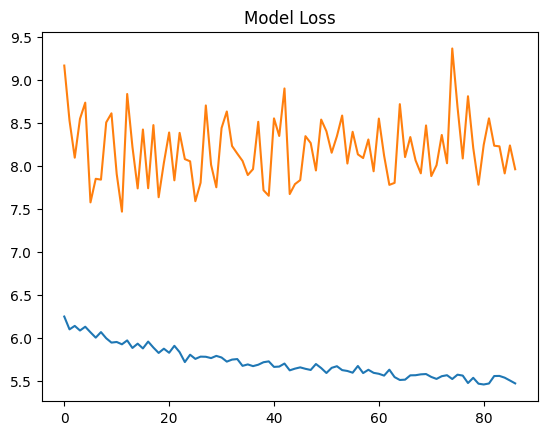

In [ ]:


plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)



Plotting Sex Accuracy

TypeError: 'tuple' object is not callable

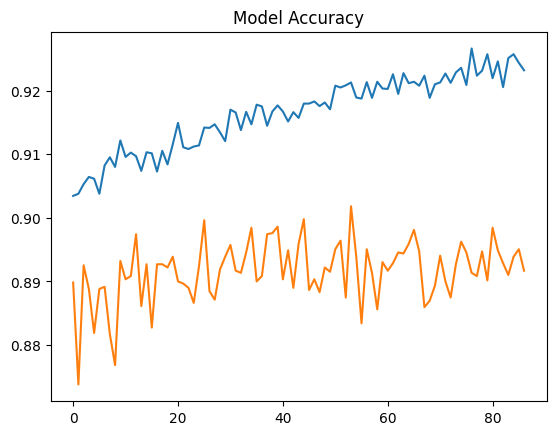

In [ ]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)



Plotting Gender Accuracy

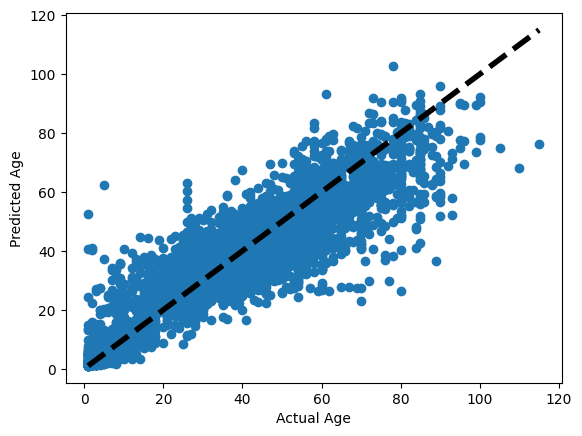

In [ ]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

In [ ]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
report=classification_report(Y_test_2[0],Pred_l)

In [ ]:
print(report)


              precision    recall  f1-score   support

           0       0.87      0.92      0.90      3039
           1       0.91      0.86      0.88      2888

    accuracy                           0.89      5927
   macro avg       0.89      0.89      0.89      5927
weighted avg       0.89      0.89      0.89      5927




Making Heatmap of the Model (Gender only)

In [ ]:
results=confusion_matrix(Y_test_2[0],Pred_l)

<AxesSubplot: >

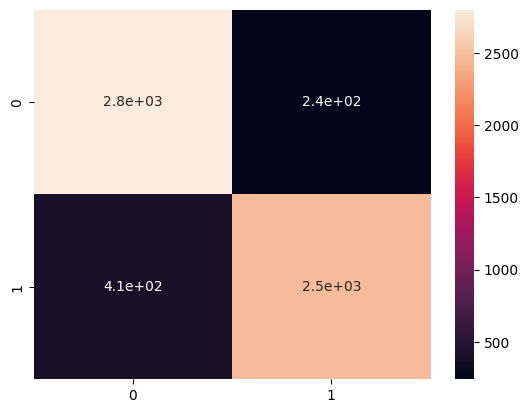

In [ ]:
import seaborn as sns
sns.heatmap(results,annot=True)

Testing The Images Ourself

In [ ]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted Age is "+ str(age))
    print("Predicted Gender is "+ sex_f[sex])
    

Test 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
Predicted Age is 88
Predicted Gender is Female


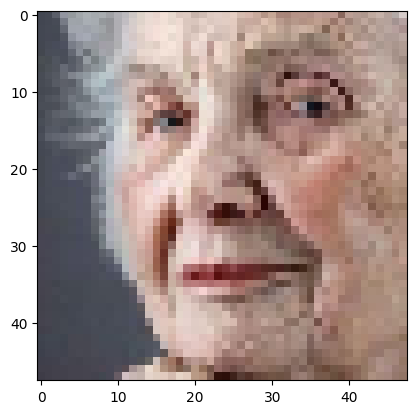

In [ ]:
test_image(4,images_f,images_f_2,Model)

Test 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Age is 11
Predicted Gender is Male


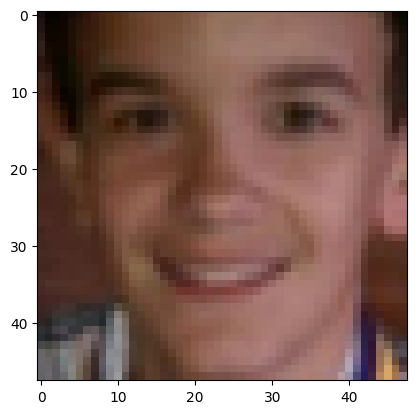

In [ ]:
test_image(23,images_f,images_f_2,Model)

Test 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted Age is 12
Predicted Gender is Male


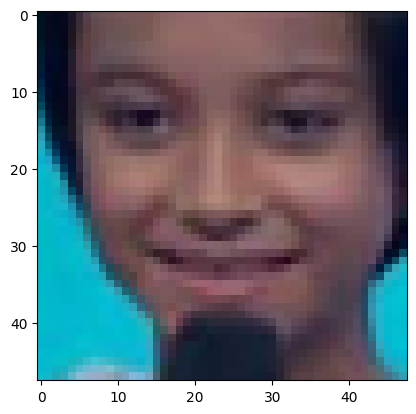

In [ ]:
test_image(168,images_f,images_f_2,Model)

Test 4

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Age is 23
Predicted Gender is Male


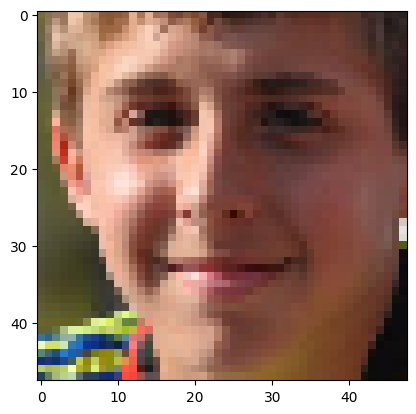

In [ ]:


test_image(888,images_f,images_f_2,Model)



Test 5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Age is 31
Predicted Gender is Female


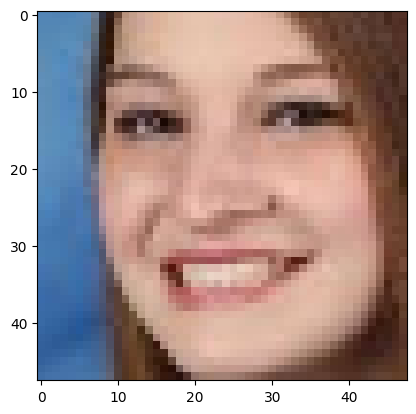

In [ ]:
test_image(1288,images_f,images_f_2,Model)